In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('/kaggle/input/location-sentiment-data-for-germany/Paris Data Pack/Location_Data.csv')

In [143]:
df = df.convert_dtypes()

In [144]:
df.head()

,geometry_id,geometry,poi_density_index,review_coverage_index,industry_distribution,most_popular_categories,most_popular_poi,has_phone,has_website,date_refreshed,sentiment,popularity,most_discussed_topics,spoken_languages,review_date_refreshed,traveler_origin,traveler_type
0,12022001101210133,"POLYGON ((2.34832763671875 48.85748700264548, ...",112.28,99.18,"[{""industry"": ""Freelance"",""percentage"": 24.24}...","[{""category"": ""Attorney"",""percentage"": 11.50},...","[{""rank"": 1,""name"": ""Cabana Beach"",""street_add...",78.3,54.47,2023-11-10,84.45,52.52,"[{""topic"": ""service"",""sentiment"": 85.22},{""top...","[{""language"": ""fr"",""sentiment"": 81.46,""percent...",2024-09-04,"[{""country"": ""fr"",""sentiment"": 78.70,""percenta...","[{""type"": ""couple"",""sentiment"": 84.71,""percent..."
1,12022001101210013,"POLYGON ((2.33734130859375 48.861101012692735,...",54.47,22.01,"[{""industry"": ""Retail"",""percentage"": 19.29},{""...","[{""category"": ""Corporate office"",""percentage"":...","[{""rank"": 1,""name"": ""Café Blanc"",""street_addre...",71.93,47.37,2023-11-10,81.28,47.48,"[{""topic"": ""location"",""sentiment"": 97.11},{""to...","[{""language"": ""fr"",""sentiment"": 82.69,""percent...",2023-12-16,"[{""country"": ""fr"",""sentiment"": 74.52,""percenta...","[{""type"": ""family"",""sentiment"": 78.00,""percent..."
2,12022001101211002,"POLYGON ((2.35107421875 48.861101012692735, 2....",100.83,75.57,"[{""industry"": ""Food & Beverage"",""percentage"": ...","[{""category"": ""Restaurant"",""percentage"": 6.15}...","[{""rank"": 1,""name"": ""Leroy Merlin Paris-Beaubo...",72.04,54.98,2023-11-10,85.43,50.76,"[{""topic"": ""service"",""sentiment"": 91.69},{""top...","[{""language"": ""fr"",""sentiment"": 83.42,""percent...",2024-09-04,<NA>,<NA>
3,12022001101033222,"POLYGON ((2.35107421875 48.86471476180277, 2.3...",132.38,31.78,"[{""industry"": ""Freelance"",""percentage"": 23.45}...","[{""category"": ""Furniture"",""percentage"": 4.70},...","[{""rank"": 1,""name"": ""GO2ROUES - Scooter & Moto...",79.42,58.12,2023-11-10,85.66,49.92,"[{""topic"": ""staff"",""sentiment"": 95.66},{""topic...","[{""language"": ""fr"",""sentiment"": 85.47,""percent...",2024-09-04,"[{""country"": ""fr"",""sentiment"": 87.11,""percenta...","[{""type"": ""couple"",""sentiment"": 83.91,""percent..."
4,12022001101211012,"POLYGON ((2.3565673828125 48.861101012692735, ...",84.1,18.73,"[{""industry"": ""Retail"",""percentage"": 26.13},{""...","[{""category"": ""Jewerly"",""percentage"": 9.08},{""...","[{""rank"": 1,""name"": ""Hank Burger"",""street_addr...",71.02,55.11,2023-11-10,86.92,44.56,"[{""topic"": ""place"",""sentiment"": 87.06},{""topic...","[{""language"": ""fr"",""sentiment"": 84.74,""percent...",2023-12-16,"[{""country"": ""au"",""sentiment"": 88.68,""percenta...","[{""type"": ""family"",""sentiment"": 86.40,""percent..."


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   geometry_id              58 non-null     Int64  
 1   geometry                 58 non-null     string 
 2   poi_density_index        58 non-null     Float64
 3   review_coverage_index    58 non-null     Float64
 4   industry_distribution    58 non-null     string 
 5   most_popular_categories  58 non-null     string 
 6   most_popular_poi         58 non-null     string 
 7   has_phone                58 non-null     Float64
 8   has_website              58 non-null     Float64
 9   date_refreshed           58 non-null     string 
 10  sentiment                58 non-null     Float64
 11  popularity               58 non-null     Float64
 12  most_discussed_topics    58 non-null     string 
 13  spoken_languages         58 non-null     string 
 14  review_date_refreshed    58 

In [146]:
df.describe()

,geometry_id,poi_density_index,review_coverage_index,has_phone,has_website,sentiment,popularity
count,58.0,58.0,58.0,58.0,58.0,58.0,58.0
mean,12022001101139960.0,96.746897,58.660345,75.302414,60.266207,87.284655,49.011552
std,87736.913487,42.322768,74.741119,7.190772,7.47296,2.957925,3.834226
min,12022001101032232.0,4.3,5.51,41.67,41.67,80.97,39.2
25%,12022001101033202.0,70.1375,20.9325,72.78,55.4325,85.415,46.775
50%,12022001101210104.0,101.305,40.755,76.55,59.82,87.375,49.315
75%,12022001101210308.0,131.195,67.0125,79.4125,64.995,89.67,51.505
max,12022001101211200.0,181.6,529.35,85.99,88.89,93.26,56.55


In [147]:
df.columns

Index(['geometry_id', 'geometry', 'poi_density_index', 'review_coverage_index',
       'industry_distribution', 'most_popular_categories', 'most_popular_poi',
       'has_phone', 'has_website', 'date_refreshed', 'sentiment', 'popularity',
       'most_discussed_topics', 'spoken_languages', 'review_date_refreshed',
       'traveler_origin', 'traveler_type'],
      dtype='object')

In [148]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (58, 17)

Missing Values:
 geometry_id                 0
geometry                    0
poi_density_index           0
review_coverage_index       0
industry_distribution       0
most_popular_categories     0
most_popular_poi            0
has_phone                   0
has_website                 0
date_refreshed              0
sentiment                   0
popularity                  0
most_discussed_topics       0
spoken_languages            0
review_date_refreshed       0
traveler_origin            12
traveler_type              11
dtype: int64


In [149]:
numerical_cols = ['poi_density_index', 'review_coverage_index', 'has_phone', 
                 'has_website', 'sentiment', 'popularity']

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

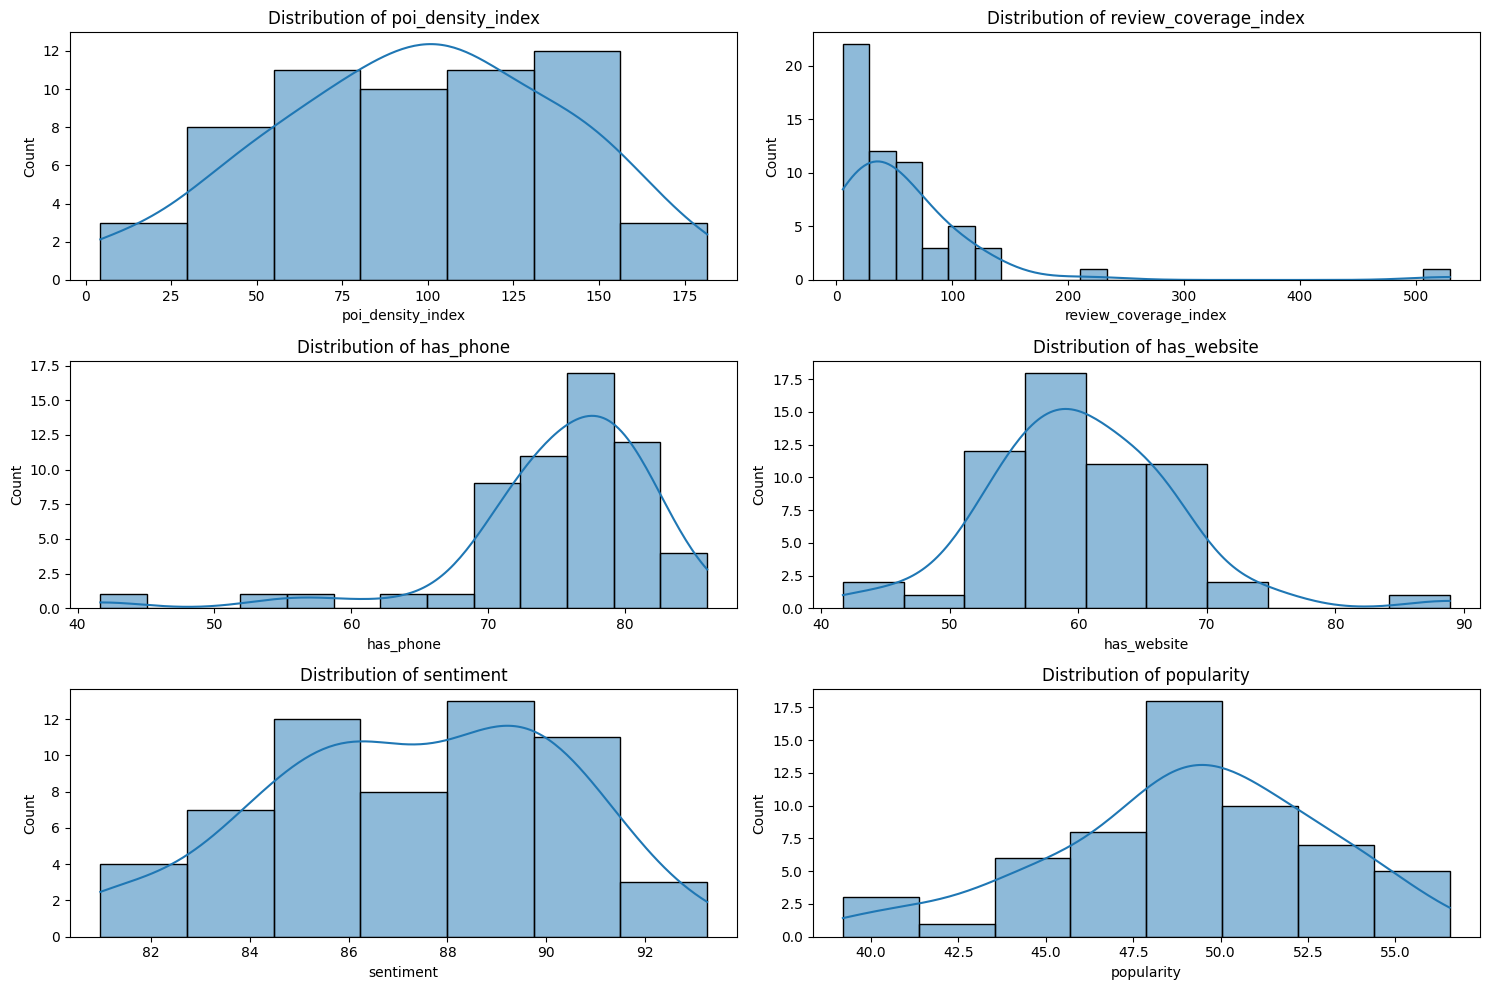

In [150]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


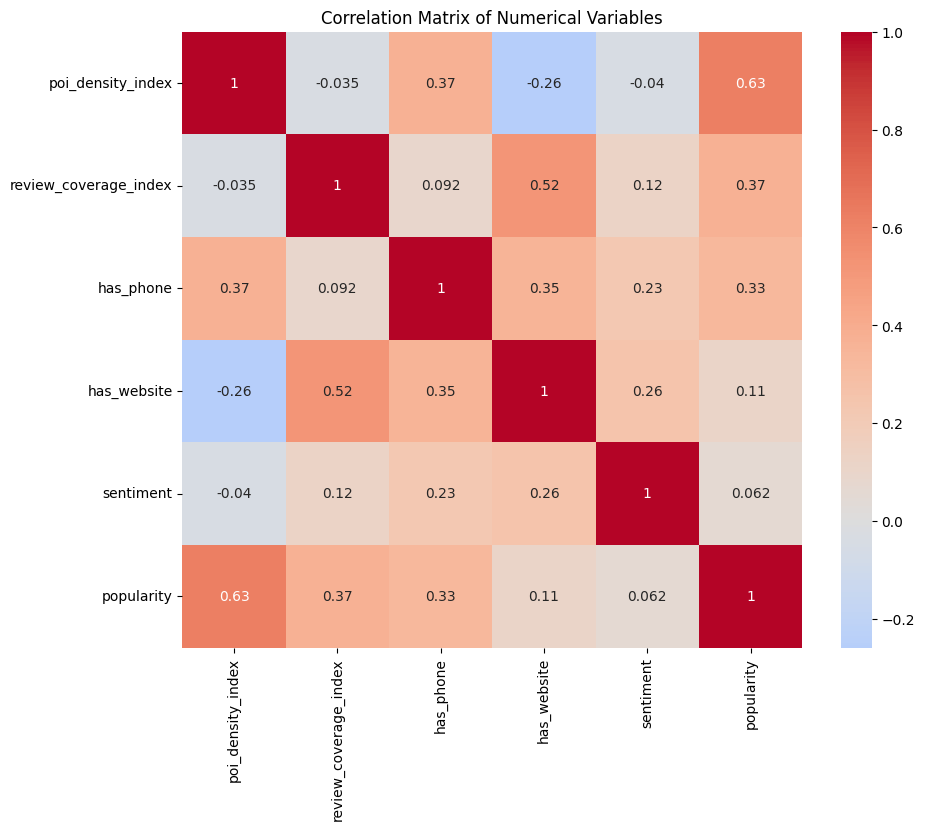

In [151]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


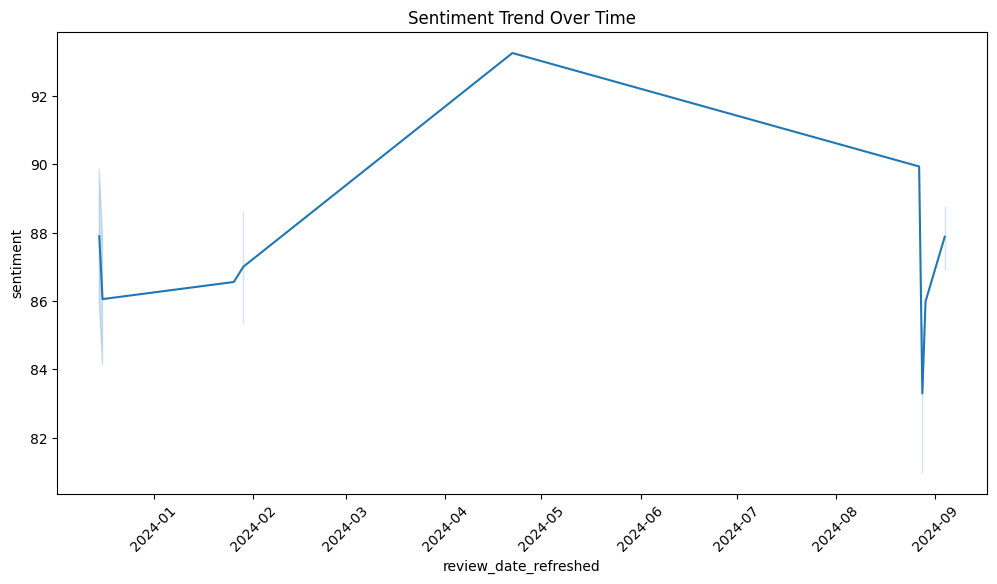

In [152]:
gdf['date_refreshed'] = pd.to_datetime(gdf['date_refreshed'])
gdf['review_date_refreshed'] = pd.to_datetime(gdf['review_date_refreshed'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=gdf, x='review_date_refreshed', y='sentiment')
plt.title('Sentiment Trend Over Time')
plt.xticks(rotation=45)
plt.show()

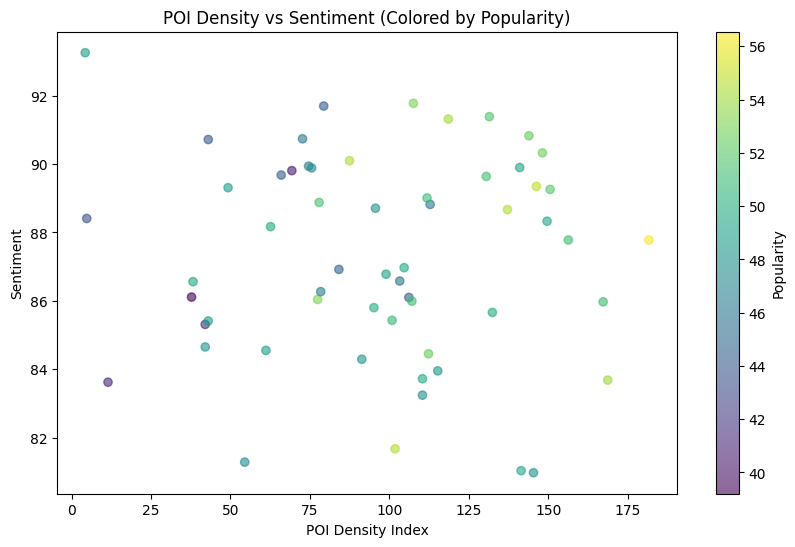

In [153]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=gdf['poi_density_index'], y=gdf['sentiment'], 
                     c=gdf['popularity'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Popularity')
plt.xlabel('POI Density Index')
plt.ylabel('Sentiment')
plt.title('POI Density vs Sentiment (Colored by Popularity)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


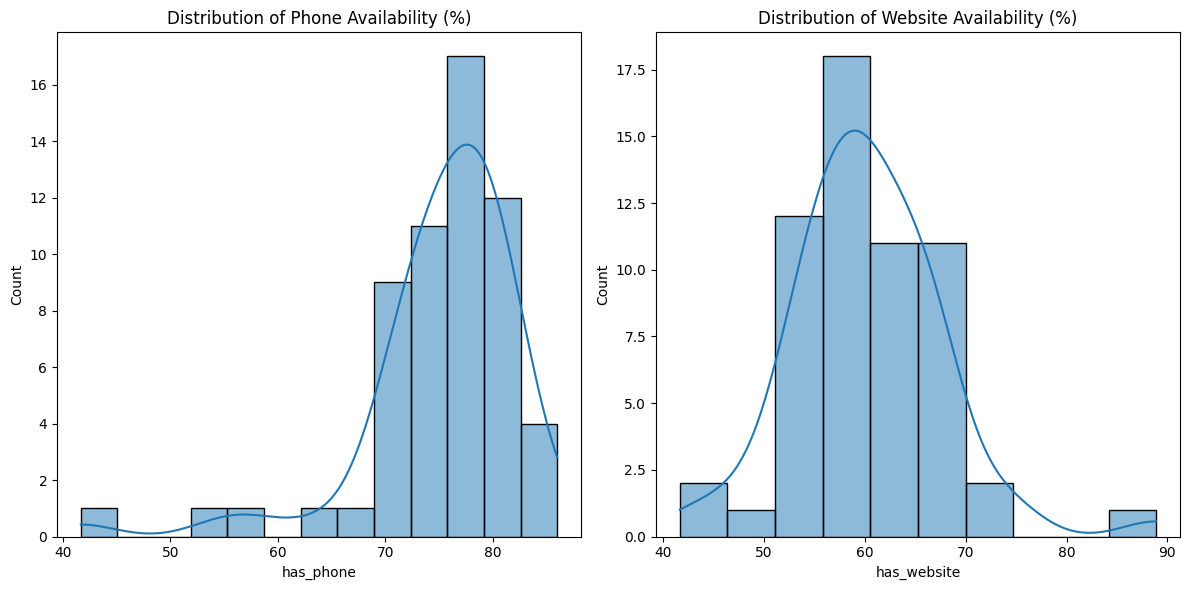

In [154]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(gdf['has_phone'], kde=True)
plt.title('Distribution of Phone Availability (%)')

plt.subplot(1, 2, 2)
sns.histplot(gdf['has_website'], kde=True)
plt.title('Distribution of Website Availability (%)')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


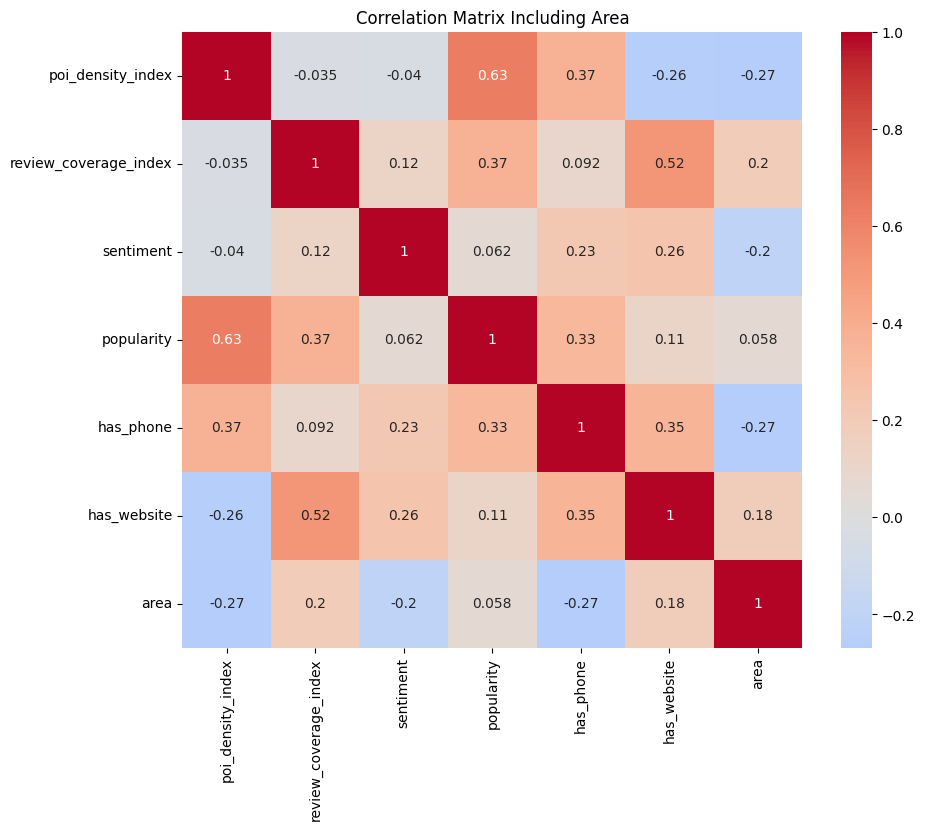

In [155]:
gdf['area'] = gdf['geometry'].area
spatial_cols = ['poi_density_index', 'review_coverage_index', 'sentiment', 
                'popularity', 'has_phone', 'has_website', 'area']
plt.figure(figsize=(10, 8))
sns.heatmap(gdf[spatial_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Including Area')
plt.show()

# Consumer Emotion Metrics # 

In [156]:
df = pd.read_csv('/kaggle/input/location-sentiment-data-for-germany/Paris Data Pack/Location_Data.csv')
df = df.convert_dtypes()

def extract_sentiment(json_str, key='sentiment'):
    try:
        data = json.loads(json_str)
        if isinstance(data, list) and len(data) > 0:
            return data[0].get(key, None)
        return None
    except:
        return None

df['topic_sentiment'] = df['most_discussed_topics'].apply(extract_sentiment)

In [157]:
print("\nSample Topic Sentiments:\n", df['topic_sentiment'].head())
print("Null Topic Sentiments:", df['topic_sentiment'].isnull().sum())


Sample Topic Sentiments:
 0    85.22
1    97.11
2    91.69
3    95.66
4    87.06
Name: topic_sentiment, dtype: float64
Null Topic Sentiments: 0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


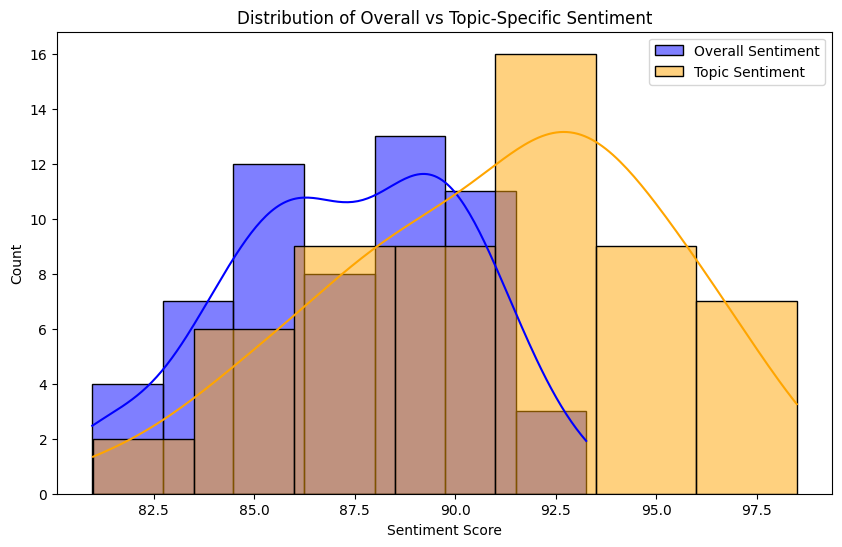

In [158]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, color='blue', label='Overall Sentiment')
sns.histplot(df['topic_sentiment'].dropna(), kde=True, color='orange', label='Topic Sentiment')
plt.title('Distribution of Overall vs Topic-Specific Sentiment')
plt.xlabel('Sentiment Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


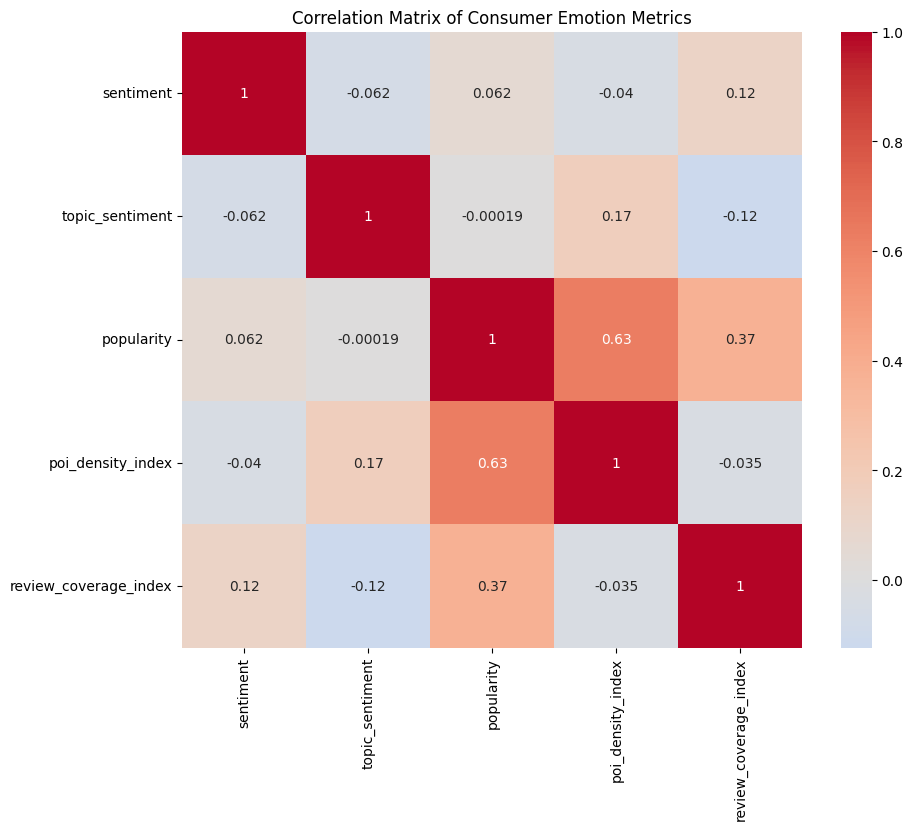

In [159]:
consumer_metrics = ['sentiment', 'topic_sentiment', 'popularity', 'poi_density_index', 'review_coverage_index']
plt.figure(figsize=(10, 8))
sns.heatmap(df[consumer_metrics].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Consumer Emotion Metrics')
plt.show()

# Social Media Sentiment Trends # 

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from datetime import datetime

df = pd.read_csv('/kaggle/input/location-sentiment-data-for-germany/Paris Data Pack/Location_Data.csv')
df = df.convert_dtypes()

df['review_date_refreshed'] = pd.to_datetime(df['review_date_refreshed'])
latest_date = df['review_date_refreshed'].max()
recent_df = df[df['review_date_refreshed'] > (latest_date - pd.Timedelta(days=30))]

In [161]:
def extract_topic_sentiment(json_str):
    try:
        data = json.loads(json_str)
        return [(item['topic'], item['sentiment']) for item in data]
    except:
        return []


topic_sentiments = recent_df['most_discussed_topics'].apply(extract_topic_sentiment)

topics_df = pd.DataFrame({
    'topic_sentiment': topic_sentiments
}).explode('topic_sentiment').dropna()

topics_df[['Topic', 'Sentiment']] = pd.DataFrame(topics_df['topic_sentiment'].tolist(), index=topics_df.index)
topics_df = topics_df.drop(columns=['topic_sentiment'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


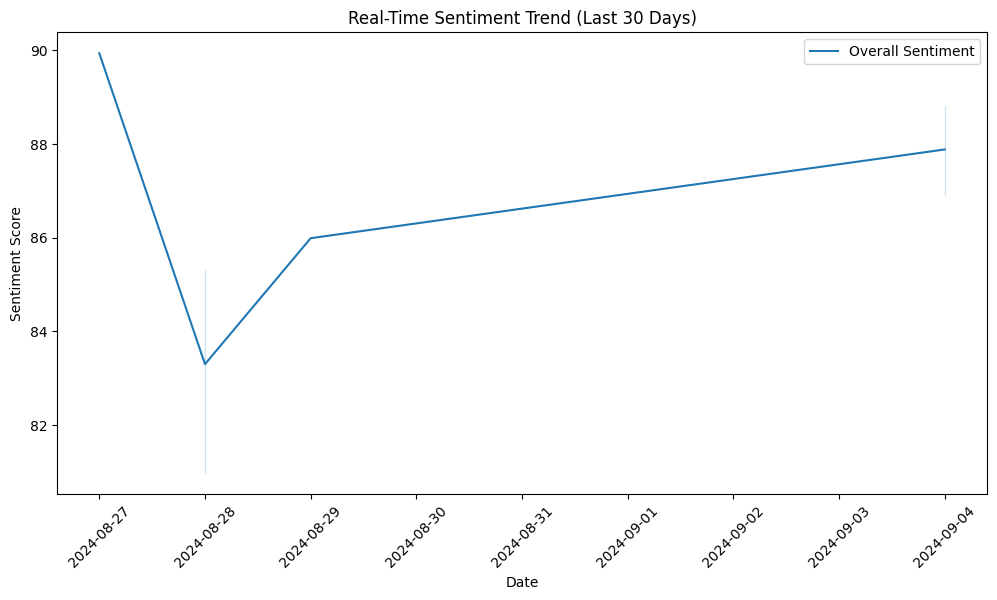

In [162]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='review_date_refreshed', y='sentiment', data=recent_df, label='Overall Sentiment')
plt.title('Real-Time Sentiment Trend (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

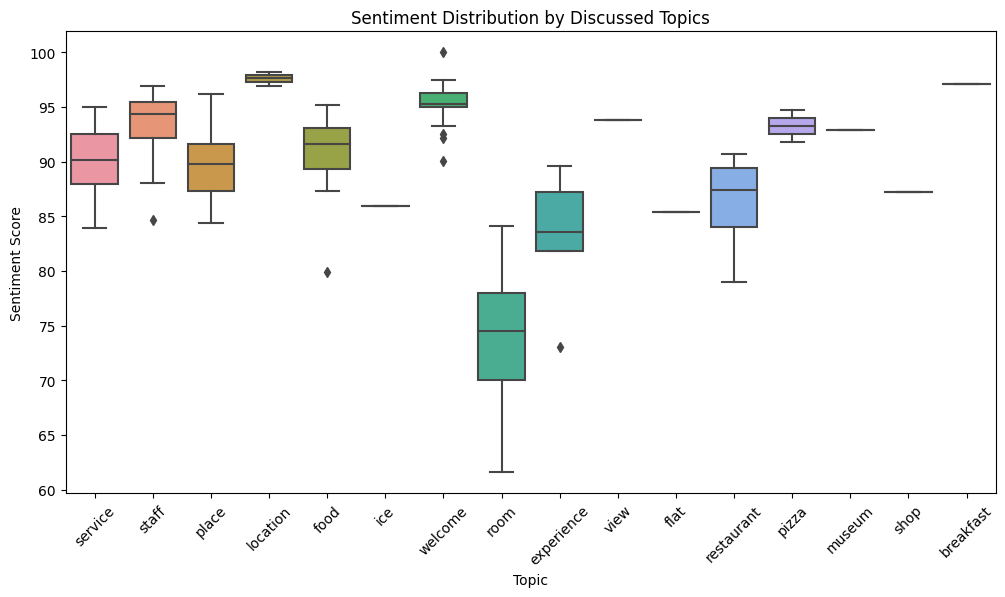

In [165]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Topic', y='Sentiment', data=topics_df)
plt.xticks(rotation=45)
plt.title('Sentiment Distribution by Discussed Topics')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.show()

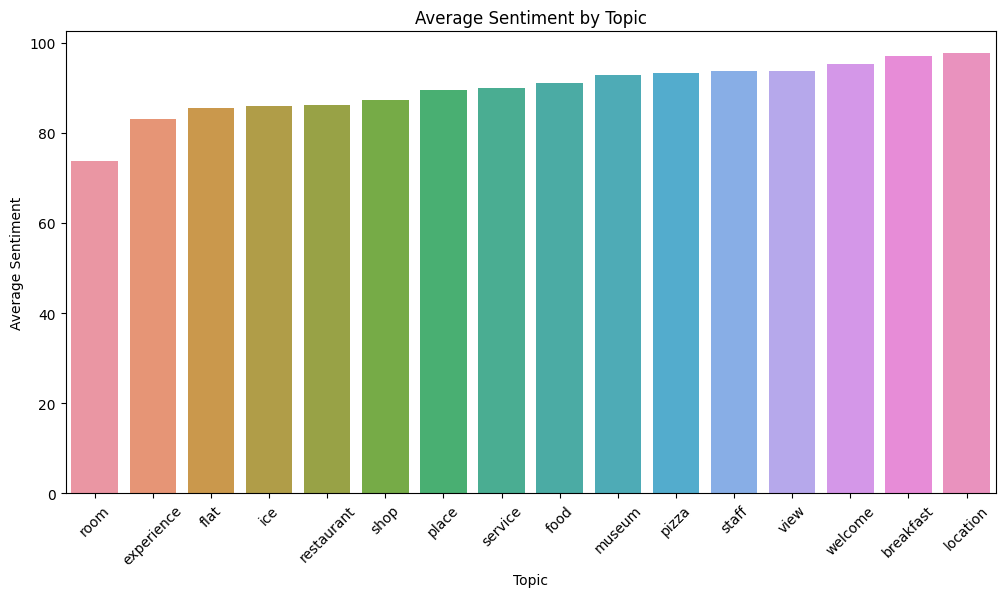

In [166]:
top_topics = topics_df.groupby('Topic')['Sentiment'].agg(['mean', 'count']).sort_values('mean')
plt.figure(figsize=(12, 6))
sns.barplot(x='Topic', y='mean', data=top_topics.reset_index())
plt.xticks(rotation=45)
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment')
plt.show()

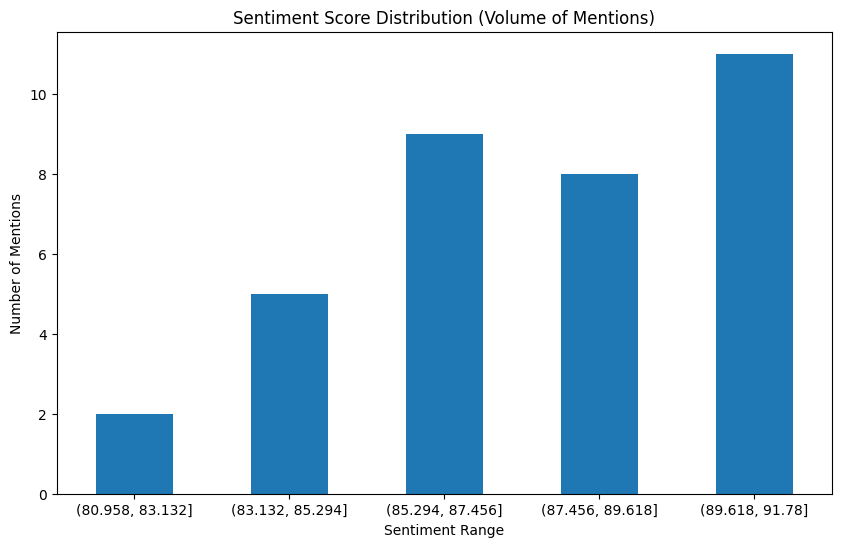

In [167]:
sentiment_counts = recent_df['sentiment'].value_counts(bins=5).sort_index()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Score Distribution (Volume of Mentions)')
plt.xlabel('Sentiment Range')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=0)
plt.show()

In [168]:
print("\nTop 5 Positive Topics:")
print(top_topics.tail(5)[['mean', 'count']])
print("\nTop 5 Negative Topics:")
print(top_topics.head(5)[['mean', 'count']])
print(f"\nAverage Sentiment (Last 30 Days): {recent_df['sentiment'].mean():.2f}")


Top 5 Positive Topics:
                mean  count
Topic                      
staff      93.646765     34
view       93.810000      1
welcome    95.281429     21
breakfast  97.140000      1
location   97.620000      8

Top 5 Negative Topics:
                mean  count
Topic                      
room        73.75875      8
experience  83.05600      5
flat        85.45000      1
ice         85.99000      1
restaurant  86.13250      4

Average Sentiment (Last 30 Days): 87.50


# Industry-Specific Sentiment Analysis

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json


df = pd.read_csv('/kaggle/input/location-sentiment-data-for-germany/Paris Data Pack/Location_Data.csv')
df = df.convert_dtypes()

def extract_industries(json_str):
    try:
        data = json.loads(json_str)
        return [(item['industry'], item['percentage']) for item in data]
    except:
        return []

industry_data = df['industry_distribution'].apply(extract_industries)

lengths = industry_data.str.len()

industry_flat = [item for sublist in industry_data for item in sublist]  # Flatten list of lists
industry_df = pd.DataFrame({
    'geometry_id': np.repeat(df['geometry_id'].values, lengths),
    'sentiment': np.repeat(df['sentiment'].values, lengths),
    'Industry': [x[0] for x in industry_flat],
    'Percentage': [x[1] for x in industry_flat]
})

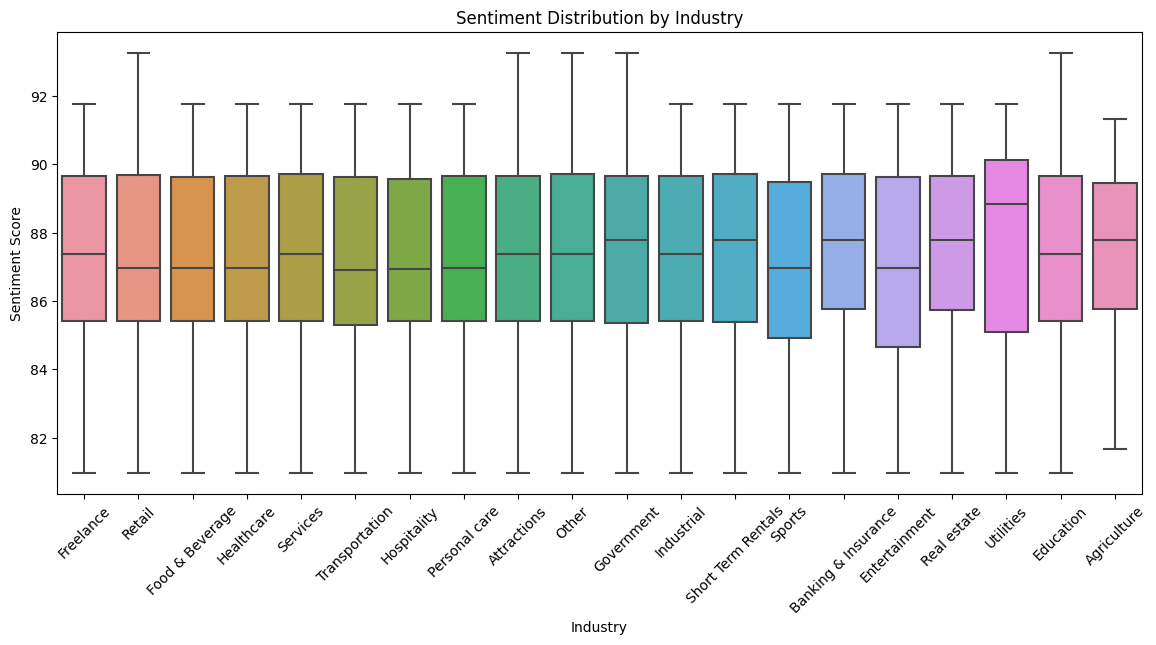

In [170]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Industry', y='sentiment', data=industry_df)
plt.xticks(rotation=45)
plt.title('Sentiment Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Sentiment Score')
plt.show()

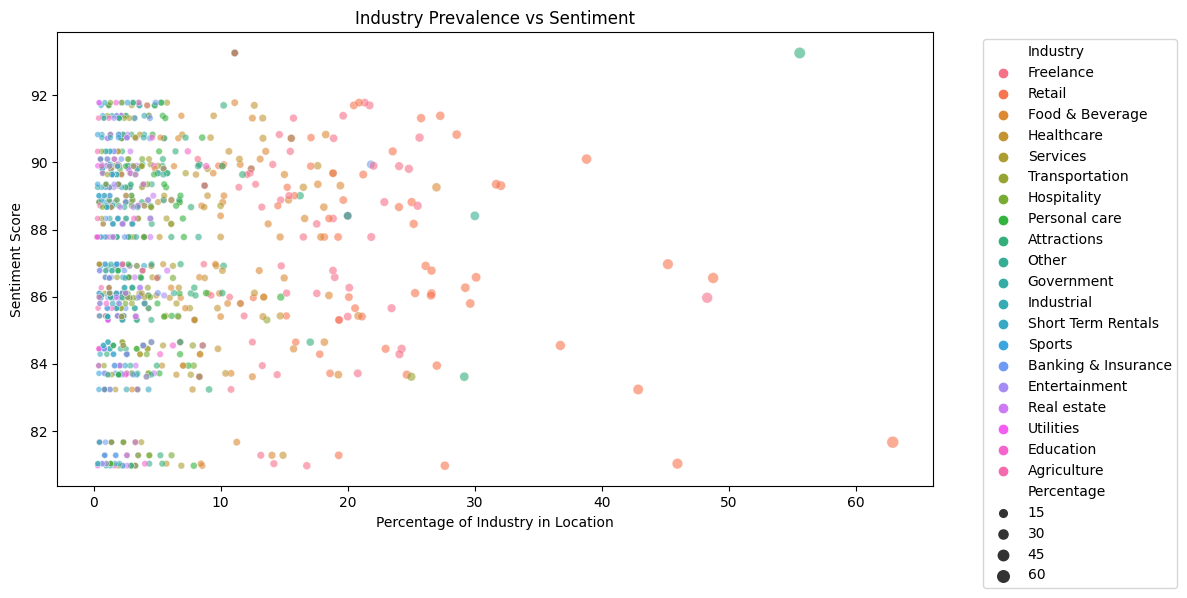

In [171]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Percentage', y='sentiment', hue='Industry', size='Percentage', data=industry_df, alpha=0.6)
plt.title('Industry Prevalence vs Sentiment')
plt.xlabel('Percentage of Industry in Location')
plt.ylabel('Sentiment Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

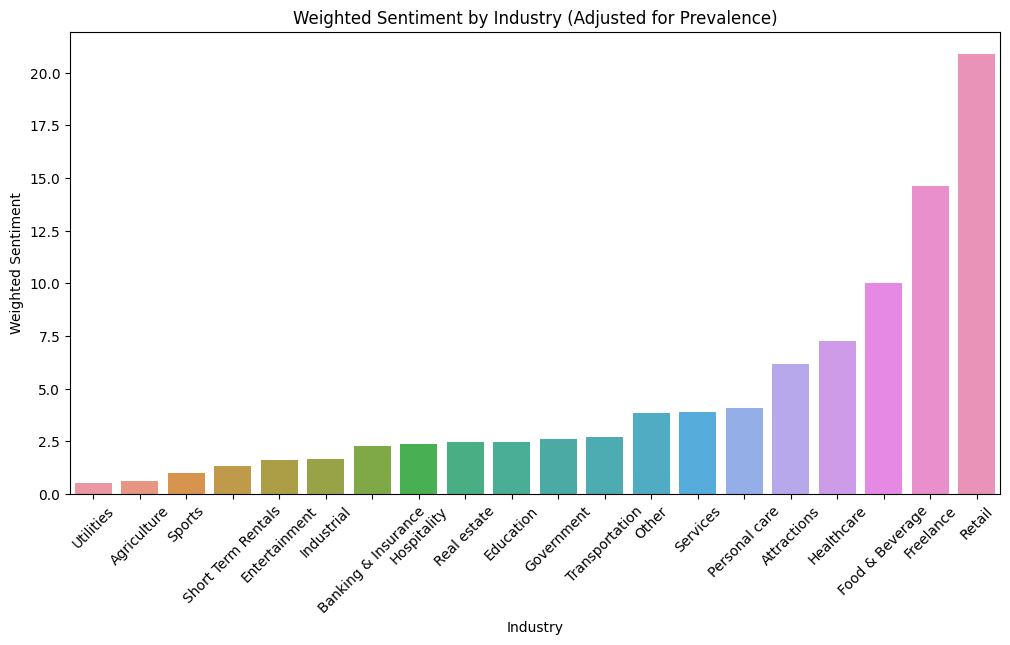

In [172]:
industry_df['weighted_sentiment'] = industry_df['sentiment'] * (industry_df['Percentage'] / 100)
weighted_sentiment = industry_df.groupby('Industry')['weighted_sentiment'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='weighted_sentiment', data=weighted_sentiment.reset_index())
plt.xticks(rotation=45)
plt.title('Weighted Sentiment by Industry (Adjusted for Prevalence)')
plt.xlabel('Industry')
plt.ylabel('Weighted Sentiment')
plt.show()

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from datetime import datetime

df = pd.read_csv('/kaggle/input/location-sentiment-data-for-germany/Paris Data Pack/Location_Data.csv')
df = df.convert_dtypes()

df['review_date_refreshed'] = pd.to_datetime(df['review_date_refreshed'])

def extract_topic_event(json_str):
    try:
        data = json.loads(json_str)
        topic = data[0]['topic'].lower() if data else 'Unknown'
        # Categorize topics into event types (simulated)
        if any(word in topic for word in ['service', 'staff', 'price']):
            return 'Economic Developments'
        elif any(word in topic for word in ['policy', 'regulation', 'government']):
            return 'Government Policies'
        else:
            return 'Local Events'
    except:
        return 'Unknown'

df['event_type'] = df['most_discussed_topics'].apply(extract_topic_event)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

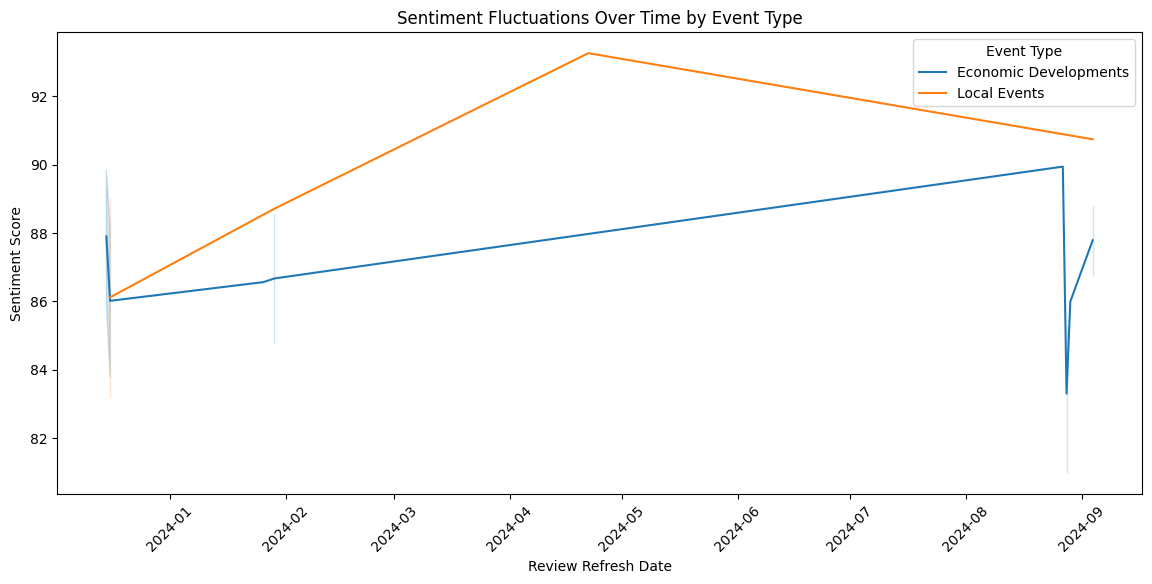

In [174]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='review_date_refreshed', y='sentiment', hue='event_type', data=df)
plt.title('Sentiment Fluctuations Over Time by Event Type')
plt.xlabel('Review Refresh Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.show()

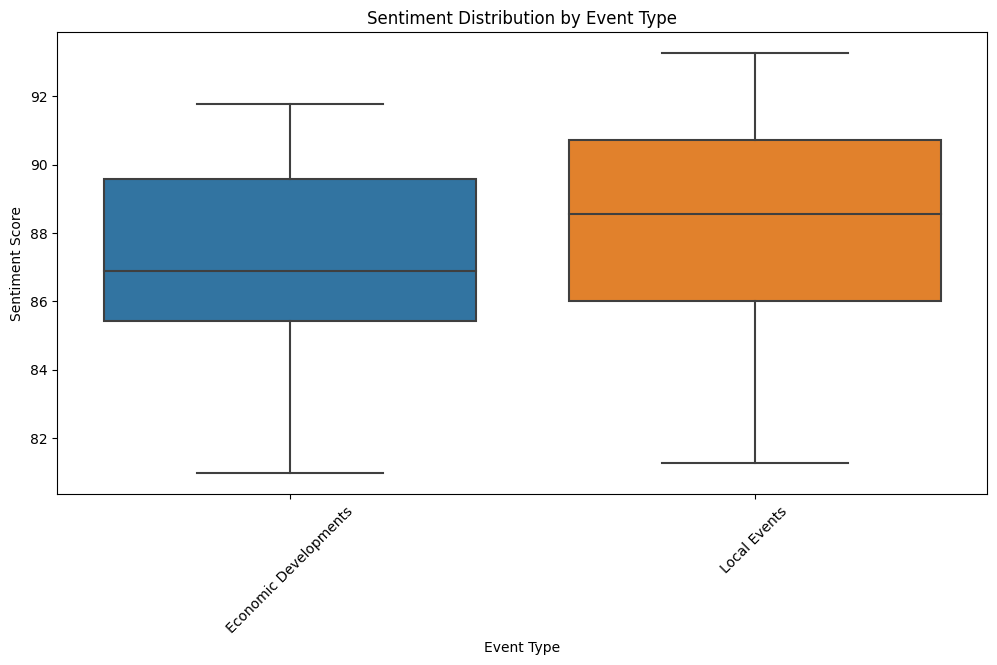

In [175]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_type', y='sentiment', data=df)
plt.title('Sentiment Distribution by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

# Automotive Industry Sentiment

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from datetime import datetime

df = pd.read_csv('/kaggle/input/location-sentiment-data-for-germany/Paris Data Pack/Location_Data.csv')
df = df.convert_dtypes()

df['review_date_refreshed'] = pd.to_datetime(df['review_date_refreshed'])

def extract_automotive(json_str):
    try:
        data = json.loads(json_str)
        for item in data:
            if 'automotive' in item['industry'].lower():
                return item['percentage']
        return 0
    except:
        return 0

df['automotive_pct'] = df['industry_distribution'].apply(extract_automotive)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


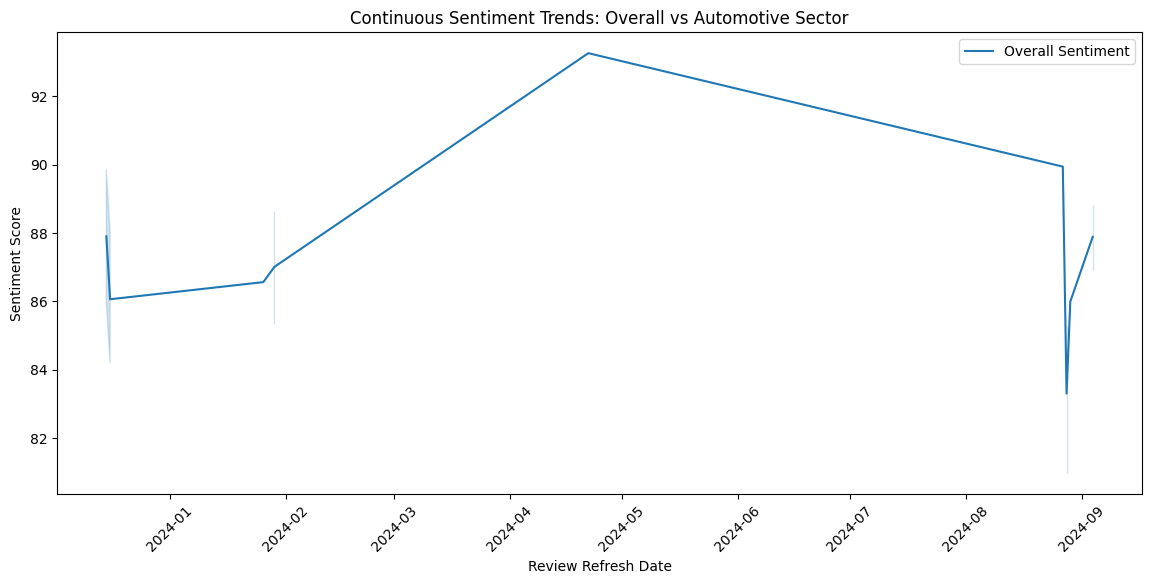

In [177]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='review_date_refreshed', y='sentiment', data=df, label='Overall Sentiment')
sns.lineplot(x='review_date_refreshed', y='sentiment', data=df[df['automotive_pct'] > 0], 
             label='Automotive-Related Sentiment')
plt.title('Continuous Sentiment Trends: Overall vs Automotive Sector')
plt.xlabel('Review Refresh Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


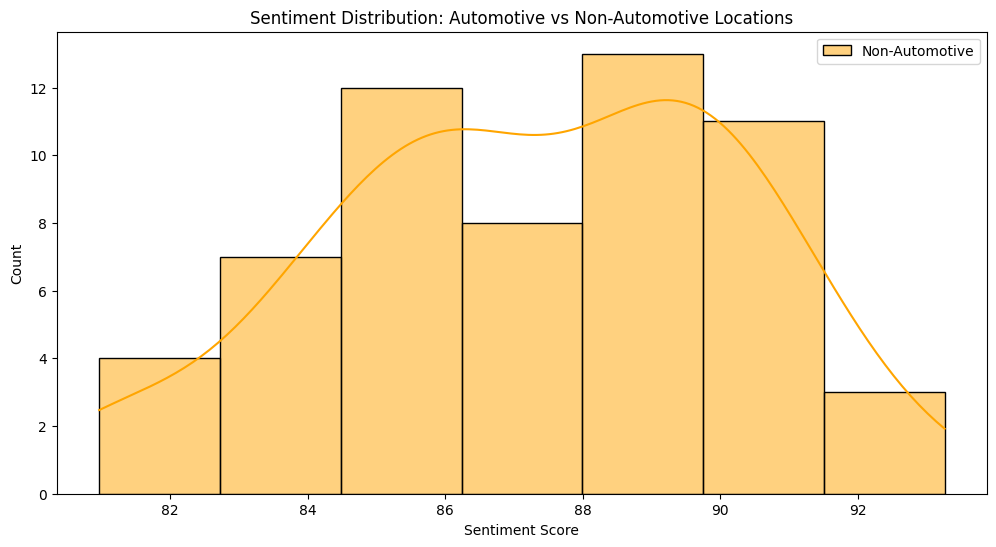

In [178]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['automotive_pct'] > 0]['sentiment'], kde=True, color='blue', label='Automotive')
sns.histplot(df[df['automotive_pct'] == 0]['sentiment'], kde=True, color='orange', label='Non-Automotive')
plt.title('Sentiment Distribution: Automotive vs Non-Automotive Locations')
plt.xlabel('Sentiment Score')
plt.legend()
plt.show()

In [179]:
def extract_ev_sentiment(json_str):
    try:
        data = json.loads(json_str)
        for item in data:
            if any(word in item['topic'].lower() for word in ['electric', 'ev', 'battery']):
                return item['sentiment']
        return None
    except:
        return None

df['ev_sentiment'] = df['most_discussed_topics'].apply(extract_ev_sentiment)

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


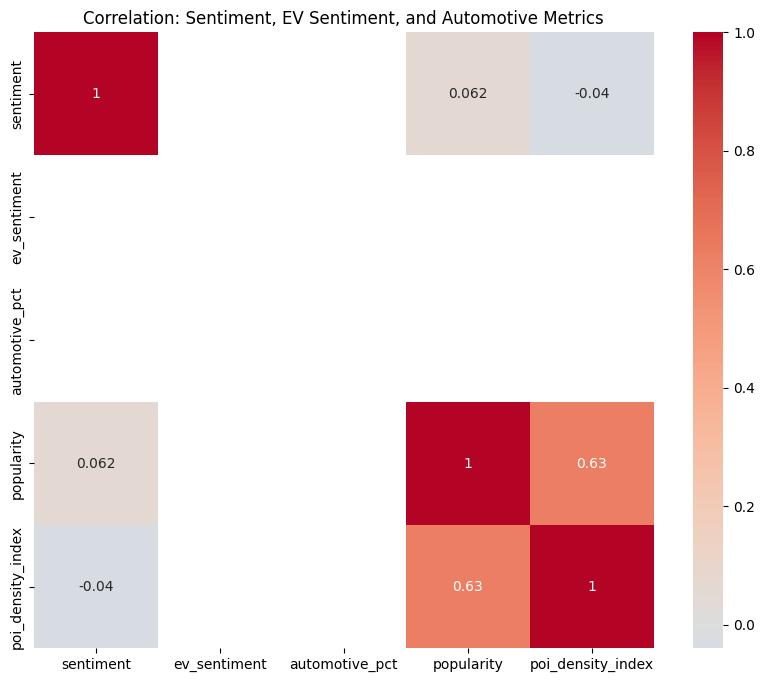

In [180]:
auto_cols = ['sentiment', 'ev_sentiment', 'automotive_pct', 'popularity', 'poi_density_index']
plt.figure(figsize=(10, 8))
sns.heatmap(df[auto_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation: Sentiment, EV Sentiment, and Automotive Metrics')
plt.show()

In [181]:
print("\nAverage Sentiment by Automotive Presence:")
print(df.groupby(df['automotive_pct'] > 0)['sentiment'].mean())


Average Sentiment by Automotive Presence:
automotive_pct
False    87.284655
Name: sentiment, dtype: Float64
